In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd

In [482]:
from IPython.display import display

In [5]:
!ls *.csv

customer_test.csv   stories_description.csv	transactions.csv
customer_train.csv  stories_reaction_test.csv
sample_submit.csv   stories_reaction_train.csv


In [6]:
def pd_intersection(a, b):
    a = set(a)
    b = set(b)
    c = a.intersection(b)
    print(f'a: {len(a)}, b: {len(b)}, c: {len(c)}')

# customer

In [7]:
df_cust_train = pd.read_csv('customer_train.csv')
df_cust_train.head()

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,894436,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,30.0,MAR,0.0,2018-03-20 09:10:16,1,Неруководящий сотрудник - обсл. Персонал
1,524526,NaN,UTL,NaN,NaN,NaN,UTL,NaN,F,20.0,UNM,0.0,2017-03-29 20:38:45,16,NaN
2,498134,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,25.0,UNM,0.0,2018-03-12 11:25:06,22,NaN
3,278941,NaN,NaN,UTL,CLS,NaN,UTL,UTL,M,25.0,NaN,NaN,2016-02-21 18:47:51,16,Неруководящий сотрудник - специалист
4,877312,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,40.0,MAR,0.0,2018-03-07 11:17:02,22,NaN


In [8]:
df_cust_valid = pd.read_csv('customer_test.csv')
df_cust_valid.head()

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,234305,NaN,NaN,NaN,NaN,NaN,UTL,NaN,F,25.0,NaN,0.0,2015-10-29 09:59:10,22,Менеджер проектов
1,914339,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,15.0,NaN,0.0,2018-04-09 08:51:54,22,NaN
2,895631,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,20.0,NaN,0.0,2018-03-22 10:38:33,16,Менеджер по продажам
3,954837,NaN,NaN,NaN,NaN,NaN,UTL,NaN,F,25.0,NaN,0.0,2018-05-09 18:24:32,16,Инженер
4,391590,NaN,UTL,NaN,NaN,NaN,NaN,NaN,M,30.0,UNM,0.0,2016-10-08 05:29:20,20,сборщик мебели


In [9]:
pd_intersection(
    df_cust_train['customer_id'].unique().tolist(),
    df_cust_valid['customer_id'].unique().tolist(),
)

a: 50000, b: 54245, c: 50000


# stories_reaction

In [10]:
df_user_item_train = pd.read_csv('stories_reaction_train.csv')
df_user_item_train.head()

,customer_id,story_id,event_dttm,event
0,15,138,2018-07-24 15:33:22,view
1,15,202,2018-06-04 08:08:08,skip
2,15,222,2018-06-17 13:44:45,skip
3,15,379,2018-05-23 05:41:43,skip
4,15,544,2018-07-25 02:16:29,view


In [11]:
df_user_item_valid = pd.read_csv('stories_reaction_test.csv')
df_user_item_valid.head()

,customer_id,story_id,event_dttm,answer_id
0,466906,1152,2018-08-01 00:00:46,0
1,466906,1355,2018-08-01 00:00:46,1
2,146395,537,2018-08-01 00:02:08,2
3,897303,915,2018-08-01 00:02:30,3
4,50094,1415,2018-08-01 00:03:13,4


In [12]:
df_user_item_train['event_dttm'] = pd.to_datetime(df_user_item_train['event_dttm'])
df_user_item_valid['event_dttm'] = pd.to_datetime(df_user_item_valid['event_dttm'])

In [13]:
pd_intersection(
    df_user_item_train['customer_id'].unique().tolist(),
    df_user_item_valid['customer_id'].unique().tolist(),
)

a: 41001, b: 22646, c: 14260


In [14]:
df_user_item_train['event_dttm'].agg(['min', 'max'])

min   2018-03-29 11:30:44
max   2018-07-31 23:58:14
Name: event_dttm, dtype: datetime64[ns]

In [15]:
df_user_item_valid['event_dttm'].agg(['min', 'max'])

min   2018-08-01 00:00:46
max   2018-08-22 20:49:33
Name: event_dttm, dtype: datetime64[ns]

In [16]:
def plot_dates(s_dt):
    s = s_dt.dt.floor('D')
    s = s - pd.to_timedelta(s.dt.day - 1, 'D')
    s = s.value_counts()
    return s

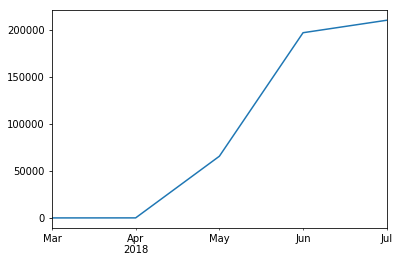

In [17]:
plot_dates(df_user_item_train['event_dttm']).plot()

In [18]:
plot_dates(df_user_item_valid['event_dttm'])

2018-08-01    172049
Name: event_dttm, dtype: int64

In [19]:
len(df_user_item_train) / (len(df_user_item_train) + len(df_user_item_valid))

0.7333359165517135

In [20]:
df_user_item_train = df_user_item_train.sort_values('event_dttm')

In [21]:
split_pos = int(len(df_user_item_train) * 0.75)
df_user_item_train, df_user_item_test = df_user_item_train.iloc[:split_pos], df_user_item_train.iloc[split_pos:]

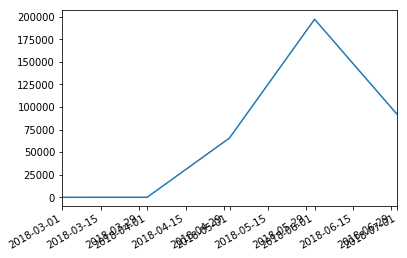

In [22]:
plot_dates(df_user_item_train['event_dttm']).plot()

In [23]:
plot_dates(df_user_item_test['event_dttm'])

2018-07-01    118286
Name: event_dttm, dtype: int64

### Пересечение train и test по просмотренным items

In [24]:
len(df_user_item_train.groupby(['customer_id', 'story_id']).count())

337245

In [25]:
len(df_user_item_test.groupby(['customer_id', 'story_id']).count())

113391

In [26]:
pd.merge(
    df_user_item_train.groupby(['customer_id', 'story_id']).count(),
    df_user_item_test.groupby(['customer_id', 'story_id']).count(),
    how='inner', left_index=True, right_index=True)

,,event_dttm_x,event_x,event_dttm_y,event_y
customer_id,story_id,,,,
521,1211,2,2,2,2
1939,509,1,1,1,1
2679,509,1,1,1,1
2846,956,1,1,1,1
3431,1312,1,1,1,1
...,...,...,...,...,...
974220,1245,1,1,1,1
975675,1286,1,1,1,1
979046,1224,1,1,1,1


# transactions

In [27]:
df_trans = pd.read_csv('transactions.csv')
df_trans.head()

,customer_id,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,855115,7,3,1500,4554547,5411
1,997036,6,6,0,1657528,5411
2,398237,5,24,2500,26375569,5813
3,997036,6,2,0,16304402,5411
4,291636,7,25,0,1259505,5411


In [28]:
df_trans['customer_id'].nunique()

46948

In [29]:
pd_intersection(
    df_user_item_train['customer_id'].unique().tolist(),
    df_trans['customer_id'].unique().tolist(),
)

a: 34379, b: 46948, c: 30795


In [30]:
pd_intersection(
    df_user_item_test['customer_id'].unique().tolist(),
    df_trans['customer_id'].unique().tolist(),
)

a: 17218, b: 46948, c: 15757


In [31]:
pd_intersection(
    df_user_item_valid['customer_id'].unique().tolist(),
    df_trans['customer_id'].unique().tolist(),
)

a: 22646, b: 46948, c: 20053


# stories_description

In [32]:
df_stories = pd.read_csv('stories_description.csv')
df_stories.head()

,story_id,story_json
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""..."
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""..."
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""..."
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""..."
4,598,"{""guid"":""ed8754bd-67be-4fa1-9289-5508d96f1fa4""..."


# Baseline

In [64]:
from sklearn.metrics import roc_auc_score

In [ ]:
df_event_weights = pd.Series({
    'dislike': -10,
    'skip': -0.1,
    'view': 0.1,
    'like': 0.5,
})
df_event_weights

In [ ]:
def tinkoff_metric(df):
    s_event_weights = df['event'].map(df_event_weights)
    res = s_event_weights * df['score']
    return res.mean().round(6), len(res)

In [ ]:
def tinkoff_metric_split(df):
    df = df.copy()
    df['cust_kind'] = df['customer_id'].isin(df_user_item_train['customer_id'].unique()) \
        .map({True: 'warm', False: 'cold'})
    
    return {
        'all': tinkoff_metric(df),
        'cold': tinkoff_metric(df[df['cust_kind'].eq('cold')]),
        'warm': tinkoff_metric(df[df['cust_kind'].eq('warm')]),
    }

In [ ]:
def label_ranking_average_precision_score(df_scores):
    df = pd.merge(df_scores, df_true.assign(hit=1), how='left', on=['user_id', 'item_id'])
    df['hit'] = df['hit'].fillna(0)
    df = df.sort_values(['user_id', 'relevance'], ascending=[True, False])

    df['rank'] = df.groupby('user_id').cumcount() + 1
    df['hit_count'] = df.groupby('user_id')['hit'].cumsum()
    df['score'] = df['hit_count'] / df['rank']
    df = df[df['hit'].eq(1)]

    rank_hist = df.groupby('rank')['user_id'].count().sort_index()
    total_rank_hist = rank_hist.sum()
    show_pos = 5
    info = ', '.join(
        f'{x:.2f}' for x in [v / total_rank_hist for _, v in sorted(rank_hist.iloc[:show_pos].to_dict().items())] +
        [rank_hist.iloc[show_pos:].sum() / total_rank_hist]
    )
    logger.info(f'rank_hist: [{info} ...] from {total_rank_hist}')

    df = df.groupby('user_id')['score'].mean()

    if not reduce:
        return df
    score = df.mean()
    return float(score)


## Const

In [ ]:
df_test_predict = df_user_item_test.copy()
df_test_predict['score'] = -1

In [ ]:
tinkoff_metric_split(df_test_predict)

## Polular prediction

In [429]:
df_user_item_train.groupby('event')[['customer_id']].count() / len(df_user_item_train)

,customer_id
event,
dislike,0.014606
like,0.132426
skip,0.353203
view,0.499765


In [430]:
df_user_item_train.pivot_table(
    index='customer_id', columns='event',
    values='story_id', aggfunc='count', fill_value=0).gt(0).mean()

event
dislike    0.068501
like       0.252072
skip       0.734780
view       0.823032
dtype: float64

In [431]:
df_user_item_train.pivot_table(
    index='story_id', columns='event',
    values='customer_id', aggfunc='count', fill_value=0).gt(0).mean()

event
dislike    0.533825
like       0.674047
skip       0.932349
view       0.971710
dtype: float64

In [432]:
# fit users
df_train_user_popularity = df_user_item_train.pivot_table(
    index='customer_id', columns='event',
    values='story_id', aggfunc='count', fill_value=0)

df_train_user_popularity = df_train_user_popularity.div(df_train_user_popularity.sum(axis=1), axis=0)

df_train_user_popularity

event,dislike,like,skip,view
customer_id,,,,
15,0.0,0.000000,0.411765,0.588235
73,0.0,0.000000,0.846154,0.153846
129,0.0,0.000000,0.562500,0.437500
144,0.0,0.000000,0.000000,1.000000
150,0.0,0.333333,0.666667,0.000000
...,...,...,...,...
1095251,0.0,0.000000,0.000000,1.000000
1098683,0.0,0.000000,1.000000,0.000000
1099266,0.0,0.000000,0.500000,0.500000


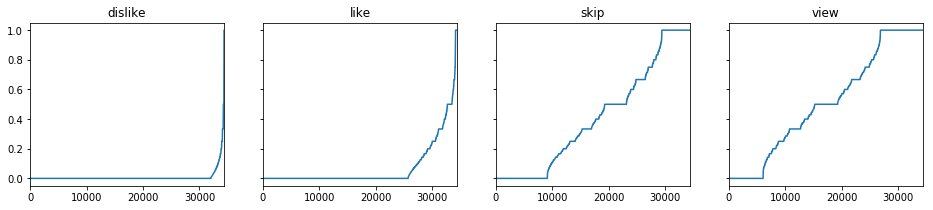

In [433]:
_, axs = plt.subplots(1, 4, figsize=(16, 3), sharey=True)
for col, ax in zip(['dislike', 'like', 'skip', 'view'], axs):
    df_train_user_popularity[col].sort_values().reset_index(drop=True).plot(ax=ax, title=col)

In [434]:
df_event_scores = {
    'dislike': -10,
    'skip': -0.0,
    'view': 0.0,
    'like': 1.0,
}

In [435]:
df_train_user_popularity_score += 0.01
df_train_user_popularity_score = df_train_user_popularity.mul(df_event_scores)
df_train_user_popularity = df_train_user_popularity.div(df_train_user_popularity.sum(axis=1), axis=0)
df_train_user_popularity_score = df_train_user_popularity_score.sum(axis=1).rename('user_score')

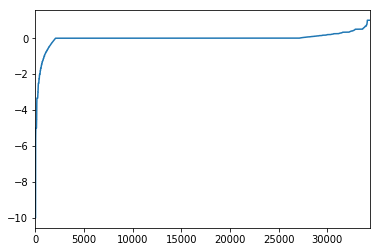

In [436]:
df_train_user_popularity_score.sort_values().reset_index(drop=True).plot()

In [437]:
# fit items
df_train_item_popularity = pd.merge(
    df_user_item_train[lambda x: x['event'].isin(['dislike', 'like'])].assign(score=df_user_item_train['event'].map(df_event_scores)),
    df_train_user_popularity_score,
    left_on='customer_id', right_index=True,
).assign(item_score=lambda x: x.score - x.user_score * 0.2) \
    .groupby('story_id')['item_score'].mean().sort_values()

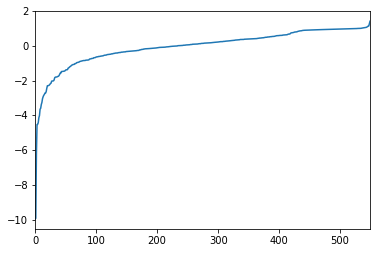

In [438]:
df_train_item_popularity.reset_index(drop=True).plot()

In [439]:
# predict
df_train_predict = pd.merge(
    pd.merge(df_user_item_train, df_train_item_popularity,
                           how='left', left_on='story_id', right_index=True).fillna(0.0),
    df_train_user_popularity_score,
    how='left', left_on='customer_id', right_index=True
).fillna(0.0).assign(score=lambda x: x.item_score + x.user_score * 0.2)


df_test_predict = pd.merge(
    pd.merge(df_user_item_test, df_train_item_popularity,
                           how='left', left_on='story_id', right_index=True).fillna(0.0),
    df_train_user_popularity_score,
    how='left', left_on='customer_id', right_index=True
).fillna(0.0).assign(score=lambda x: x.item_score + x.user_score * 0.2)

In [440]:
df_train_predict

,customer_id,story_id,event_dttm,event,item_score,user_score,score
415192,843538,522,2018-03-29 11:30:44,skip,0.654819,0.0,0.654819
415188,843538,247,2018-03-29 11:30:44,view,0.000000,0.0,0.000000
376367,749436,498,2018-03-31 04:47:12,skip,0.404299,0.0,0.404299
415190,843538,428,2018-04-03 05:13:38,skip,0.213752,0.0,0.213752
415189,843538,419,2018-04-03 05:13:38,view,0.048392,0.0,0.048392
...,...,...,...,...,...,...,...
64049,132061,314,2018-07-15 11:49:52,dislike,-3.259131,-2.0,-3.659131
205344,387489,745,2018-07-15 11:52:38,view,-0.030452,0.0,-0.030452
205345,387489,997,2018-07-15 11:52:38,view,-0.957005,0.0,-0.957005
219993,414840,1000083,2018-07-15 11:53:04,view,1.045135,0.0,1.045135


In [441]:
def rocauc_by_cust(df):
    df = df.copy()
    df = df[df['event'].isin(['dislike', 'like'])]
    df['event'] = df['event'].map({'dislike': 0, 'like': 1})

    res = df.groupby('customer_id').apply(lambda x: roc_auc_score(x['event'], x['score'])
                                          if x['event'].nunique() > 1 else np.NaN)
    return res    

In [442]:
rocauc_by_cust(df_train_predict).mean()

0.7139289310613818

In [443]:
rocauc_by_cust(df_test_predict).mean()

0.7204284251205677

0.7204284251205677

In [444]:
rocauc_by_cust(df_test_predict[lambda x: x.customer_id.isin(df_train_predict.customer_id)]).mean()

0.7192049210481039

0.7192049210481039

In [445]:
rocauc_by_cust(df_test_predict[lambda x: ~x.customer_id.isin(df_train_predict.customer_id)]).mean()

0.7312056737588652

0.7312056737588652

# ALS

In [395]:
import implicit
import scipy.sparse
from tqdm.autonotebook import tqdm

In [396]:
from functools import reduce

In [397]:
class ALSModel:
    def __init__(self, factors, weights):
        if 'OPENBLAS_NUM_THREADS' not in os.environ:
            os.environ['OPENBLAS_NUM_THREADS'] = '1'
        
        self.model = implicit.als.AlternatingLeastSquares(factors=factors)
        self.weights = weights

        self.df_item_freq = None
        self.item_index = None
        self.user_index = None
        
        self.item_map = None
        self.user_map = None

    def get_item_user_matrix(self, df_log):
        df = df_log.copy()

        df = df.assign(score=df_user_item_train['event'].map(self.weights))
        df = pd.merge(
            df,
            df_train_user_popularity_score,
            left_on='customer_id', right_index=True,
        )
        df = pd.merge(
            df,
            df_train_item_popularity,
            left_on='story_id', right_index=True,
        )
        df = df.assign(relevance=lambda x: x.score - x.user_score * 0.2 - x.item_score * 1.0)
        
        df = df.groupby(['customer_id', 'story_id'])[['relevance']].mean().reset_index()
        df['customer_id'] = df['customer_id'].map(self.user_map)
        df['story_id'] = df['story_id'].map(self.item_map)
        
        df = df[~df.isna().any(axis=1)]
        
        return scipy.sparse.csr_matrix((df['relevance'],
                                        (df['story_id'],
                                         df['customer_id']),
                                        ),
                                       shape=(len(self.item_index), len(self.user_index)))

    def model_train(self, df_log):
        self.item_index = df_log['story_id'].unique()
        self.user_index = df_log['customer_id'].unique()
        self.item_map = {k: v for v, k in enumerate(self.item_index)}
        self.user_map = {k: v for v, k in enumerate(self.user_index)}

        item_user_data = self.get_item_user_matrix(df_log)
        print(f'item_user_data matrix of type {type(item_user_data)} with shape: {item_user_data.shape}')
        self.model.fit(item_user_data)

    def model_predict(self, df_log_exclude, df_log_predict):
        user_item_data = self.get_item_user_matrix(df_log_exclude).T.tocsr()

        predicted_rows = []

        for_predict = df_log_predict.groupby('customer_id')['story_id'].apply(np.array)
        for user_id, item_list in tqdm(for_predict.items(), total=len(for_predict), desc='Predict'):
            user_ix = self.user_map.get(user_id, -1)
            if user_ix == -1:
                for item_id in item_list:
                    predicted_rows.append((user_id, item_id, 0.0))
            else:
                item_ix = [self.item_map.get(item_id) for item_id in item_list if item_id in self.item_map]
                if len(item_ix) > 0:
                    als_predict = self.model.rank_items(user_ix, user_item_data, item_ix)
                    for item_id, score in als_predict:
                        predicted_rows.append((user_id, self.item_index[item_id], score))
                for item_id in [item_id for item_id in item_list if item_id not in self.item_map]:
                    predicted_rows.append((user_id, item_id, 0.0))

        predicted_rows = pd.DataFrame(predicted_rows, columns=['customer_id', 'story_id', 'relevance'])
        predicted_rows = predicted_rows.groupby(['customer_id', 'story_id'])['relevance'].max().reset_index()
        predicted = pd.merge(
            df_log_predict,
            predicted_rows,
            how='inner', on=['customer_id', 'story_id'],
        )
        predicted = pd.merge(
            predicted,
            df_train_user_popularity_score,
            how='left', left_on='customer_id', right_index=True,
        )
        predicted['user_score'] = predicted['user_score'].fillna(0)
        predicted = pd.merge(
            predicted,
            df_train_item_popularity,
            how='left', left_on='story_id', right_index=True,
        )
        predicted['item_score'] = predicted['item_score'].fillna(0)
                
        predicted['score'] = predicted['relevance'] + predicted['user_score'] * 0.2 + predicted['item_score'] * 1.0

        return predicted

    def model_predict_top_k(
            self,
            df_log_exclude,
            id_users, id_items,
            k,
    ):
        raise NotImplementedError()


In [471]:
model_dl = ALSModel(factors=32, weights={
            'dislike': -10,
            'skip': 0,
            'view': 0,
            'like': 1,
        })

In [472]:
model_dl.model_train(df_user_item_train[lambda x: x['event'].isin(['dislike', 'like'])])

item_user_data matrix of type <class 'scipy.sparse.csr.csr_matrix'> with shape: (550, 9345)


In [473]:
df_train_predict = model_dl.model_predict(df_user_item_train, df_user_item_train)

In [474]:
df_test_predict = model_dl.model_predict(df_user_item_train, df_user_item_test)

In [475]:
rocauc_by_cust(df_train_predict).mean()

0.8972992691893553

In [476]:
rocauc_by_cust(df_test_predict).mean()

0.7247960248276645

0.7277967254716805

In [477]:
rocauc_by_cust(df_test_predict[lambda x: x.customer_id.isin(df_train_predict.customer_id)]).mean()

0.7240683593692914

0.7274097192651643

0.7192049210481039 - popularity only (warm)

In [478]:
rocauc_by_cust(df_test_predict[lambda x: ~x.customer_id.isin(df_train_predict.customer_id)]).mean()

0.7312056737588652

0.7312056737588652

In [483]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(df_test_predict
            [lambda x: x.customer_id.isin(df_train_predict.customer_id)]
            [lambda x: x['event'].isin(['dislike', 'like'])]
            .sample(n=40).sort_values('score')
           )

,customer_id,story_id,event_dttm,event,relevance,user_score,item_score,score
19653,847035,314,2018-07-21 04:02:41,like,-0.078,0.479,-3.259,-3.241
23636,349825,420,2018-07-18 15:38:08,dislike,-0.001,0.200,-2.931,-2.892
17090,777930,1311,2018-07-17 17:12:56,dislike,0.015,-1.048,-2.295,-2.489
8644,504884,1311,2018-07-16 15:07:36,like,0.031,-0.154,-2.295,-2.295
10765,374677,1311,2018-07-17 01:18:21,like,0.000,0.000,-2.295,-2.295
7217,788612,1311,2018-07-16 11:34:08,like,0.000,0.000,-2.295,-2.295
50234,293291,1311,2018-07-22 13:05:14,like,0.008,0.120,-2.295,-2.263
33491,270383,602,2018-07-20 09:49:20,like,0.134,0.464,-1.073,-0.846
79326,197917,409,2018-07-26 12:46:20,like,-0.004,0.200,-0.758,-0.721
4014,410839,1314,2018-07-16 04:18:40,like,-0.342,-0.184,-0.146,-0.525


In [492]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(df_train_predict
            [lambda x: x.story_id == 1311]
            [lambda x: x.customer_id.isin(df_train_predict.customer_id)]
            [lambda x: x['event'].isin(['dislike', 'like'])]
            .sample(n=40).sort_values('score')
           )

,customer_id,story_id,event_dttm,event,relevance,user_score,item_score,score
345347,12513,1311,2018-07-14 10:36:53,dislike,-0.013,-0.926,-2.295,-2.493
345742,644459,1311,2018-07-15 04:36:56,dislike,-0.011,-0.871,-2.295,-2.480
347971,814964,1311,2018-07-14 10:27:18,dislike,-0.003,-0.686,-2.295,-2.435
346132,334332,1311,2018-07-14 06:04:08,dislike,-0.006,-0.438,-2.295,-2.388
345839,254463,1311,2018-07-14 05:27:28,dislike,-0.000,-0.211,-2.295,-2.337
349989,579260,1311,2018-07-14 15:46:54,dislike,0.001,-0.129,-2.295,-2.319
348945,774872,1311,2018-07-14 13:01:01,dislike,-0.001,-0.099,-2.295,-2.315
345469,514188,1311,2018-07-14 04:49:24,dislike,0.000,-0.088,-2.295,-2.312
348502,693911,1311,2018-07-14 11:52:11,dislike,-0.000,-0.053,-2.295,-2.305
345305,133700,1311,2018-07-14 04:30:33,dislike,0.000,-0.050,-2.295,-2.304


In [491]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(df_test_predict
            [lambda x: x.story_id == 1311]
            [lambda x: x.customer_id.isin(df_train_predict.customer_id)]
            [lambda x: x['event'].isin(['dislike', 'like'])]
            .sample(n=40).sort_values('score')
           )

,customer_id,story_id,event_dttm,event,relevance,user_score,item_score,score
85325,552033,1311,2018-07-27 11:30:14,like,-0.000,-2.500,-2.295,-2.795
39071,624918,1311,2018-07-21 06:55:38,like,-0.000,-1.667,-2.295,-2.628
9392,869363,1311,2018-07-16 17:01:23,like,-0.014,-1.000,-2.295,-2.508
10967,412450,1311,2018-07-17 02:04:06,like,-0.002,-0.500,-2.295,-2.396
8561,153195,1311,2018-07-16 14:49:53,like,-0.019,-0.146,-2.295,-2.343
13384,717701,1311,2018-07-17 07:17:27,like,0.000,-0.179,-2.295,-2.330
22323,182324,1311,2018-07-18 11:20:21,like,-0.078,0.256,-2.295,-2.321
12276,383292,1311,2018-07-17 04:51:57,dislike,-0.002,-0.114,-2.295,-2.320
9064,307620,1311,2018-07-16 16:14:28,like,-0.014,-0.049,-2.295,-2.318
91329,555387,1311,2018-07-28 08:09:08,like,-0.068,0.229,-2.295,-2.317


In [485]:
df_user_item_train[lambda x: x.customer_id == 788612]

,customer_id,story_id,event_dttm,event
391895,788612,382,2018-07-08 05:55:51,view
391897,788612,885,2018-07-08 05:55:51,view
391899,788612,1272,2018-07-08 05:55:51,skip
391898,788612,892,2018-07-08 05:55:51,view


In [488]:
df_user_item_train[lambda x: x.story_id == 1311].groupby('event')[['event_dttm']].count()

,event_dttm
event,
dislike,52
like,121
skip,57
view,1
